<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر سلیمانی
</font>
<p></p>
<br>
<font>
<b>فاز دوم پروژه</b>
</font>
<br>
<br>
موعد تحویل: ۵ خرداد ۱۴۰۲ <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4 >
سامانه‌های مبتنی بر یادگیری ماشین در بخش‌های مختلف از روش‌های یادگیری ماشین استفاده می‌کنند. دسته‌بندی و
خوشه‌بندی
دو کار مورد نیاز این سامانه‌ها هستند. در این تمرین به پیاده‌سازی این کارها با روش‌های مختلف و پیاده‌سازی قابلیت‌های جدید برای سیستم بازیابی روی مقالات علمی می‌پردازیم. دادگان این فاز را می‌توانید از
<a href="https://www.kaggle.com/datasets/spsayakpaul/arxiv-paper-abstracts?resource=download">این لینک</a>
دانلود کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>دسته‌بندی توسط NaiveBayes (۱۸ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به دسته‌بندی اسناد می‌پردازید. برای این منظور، ابتدا برای هر سند، بردار مربوط به تعداد کلمات کل را بسازید و سپس classifier NaiveBaise را خودتان از پایه پیاده‌سازی کرده و اسناد را دسته‌بندی کنید.
در این تسک می‌توانید از کل دیتاست استفاده نکنید ولی باید دیتاست شما شامل هر سه کلاس موجود در دیتاست اصلی باشد.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دانلود دیتاست و آشنایی با آن</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت دیتاست زیر را در kaggle دریافت کرده و ویژگی‌های آن را مشاهده کنید.
</font>
</div>

In [1]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 72.4 MB/s eta 0:00:00


In [2]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/MIR/Assignment 2/arxiv_data.csv')
df = df.drop_duplicates(subset=['titles'])

In [5]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش سایز دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید سایز دیتاست را به دلخواه کم کرده تا NaiveBayes عملکرد بهتری بتواند از خودش نشان دهد.
    کاهش سایز دیتاست می‌تواند باعث افزایش سرعت و حافظه‌ی مورد نیاز شود.
</font>
</div>

In [6]:
df = df.sample(n = len(df) // 3)
len(df)

12990

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>پیش‌پردازش دیتاست</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت می‌توانید با استفاده از تابع زیر یا توابعی که در فاز 1 تعریف کردید به پیش‌پردازش دیتاست بپردازید.
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>

In [7]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    
    normalized_tokens = word_tokenize(text)

    if stopword_removal:
        # Remove stopwords in English and also the given domain stopwords
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain_stopwords = [x.lower() for x in stopwords_domain]
        normalized_tokens = [word for word in normalized_tokens if word.lower() not in domain_stopwords + stopwords]

    if punctuation_removal:
        # Remove punctuations
        normalized_tokens = [word for word in normalized_tokens if word not in string.punctuation]

    if lower_case:
        # Convert everything to lowercase and filter based on a min length
        normalized_tokens = [word.lower() for word in normalized_tokens if len(word) > minimum_length]
    else:
        normalized_tokens = [word for word in normalized_tokens if len(word) > minimum_length]

    return normalized_tokens

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['summaries'] + df['titles'])
y = [eval(lst)[0] for lst in df['terms']]

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)

LabelEncoder()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>آماده‌سازی دیتای train و test</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
    در این قسمت با ساخت ماتریس doc-word می‌توانید دیتای مورد نیاز برای NaiveBayes را آماده کنید. در این ماتریس هر سطر نشان‌دهنده آیدی داکیومنت و هر ستون نشان‌دهنده یک کلمه در کل vocabulary شما می‌باشد.
   همچنین می‌توانید از CountVectorizer استفاده کنید. 
</font>
</div>

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>دسته‌بندی با استفاده از NaivaBayes</b>
    </h2>
    در این بخش کلاس زیر را تکمیل نمایید تا classifier NaiveBayes را <u><b>از پایه</b></u> پیاده‌سازی کنید.
</font>
</div>

In [11]:
def softmax(X):
  # Stable implementation of softmax
  X = X - np.min(X, axis = 1, keepdims = True)
  X = np.exp(X)
  probs = X / np.sum(X, axis = 1, keepdims = True)
  return probs

In [12]:
class NaiveBayes():
    def __init__(self, alpha=1.0):
        self.prior = None
        self.word_counts = None
        self.lk_word = None
        self.alpha = alpha
        
    def fit(self, X, y):
        '''
        Fit the features and the labels
        Calculate prior, word_counts and lk_word
        
        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count 
            of docs and n is size of vocabulary

        y: np.ndarray
            The real class label for each doc
            
        Returns
        -------
        self
            Returns self as a classifier
        '''

        self.prior = np.bincount(y) / len(y)
        
        # calculate word counts for each class
        self.word_counts = np.zeros((3, X.shape[1]))
        for i in range(3):
            self.word_counts[i] = X[y == i].sum(axis=0)
        
        # apply Laplace smoothing to word counts
        self.word_counts += self.alpha
        
        # calculate log likelihoods
        self.lk_word = np.log(self.word_counts / np.sum(self.word_counts, axis=1, keepdims=True))
        
        return self

    def predict(self, X):
        '''
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count 
            of docs and n is vocabulary size
        
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        '''
        log_probs = np.dot(X, self.lk_word.T) + np.log(self.prior)
        # predict the class with the highest probability

        return np.argmax(log_probs, axis=1), softmax(log_probs)

In [13]:
# use your classifier to fit on the training data
# then try to predict classes of test data

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y)

classifier = NaiveBayes()
classifier = classifier.fit(X_train.toarray(), le.transform(y_train))

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>ارزیابی مدل train شده</b>
    </h2>
    در این بخش precision، recall، F1 score را در حالت macro و micro
    و accuracy مدل
    را با استفاده از sklearn به دست آورید.
</font>
</div>

In [14]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y_pred, probs = classifier.predict(X_test.toarray())
y_true = le.transform(y_test)

F1_macro = f1_score(y_true, y_pred, average = 'macro')
F1_micro = f1_score(y_true, y_pred, average = 'micro')

acc = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average = 'micro')
precision = precision_score(y_true, y_pred, average = 'micro')

print(f'Accuracy = {acc} \n recall = {recall} \n precision = {precision} \
\n F1 macro = {F1_macro} \n F1 micro = {F1_micro}')

Accuracy = 0.8728714718917658 
 recall = 0.8728714718917658 
 precision = 0.8728714718917658 
 F1 macro = 0.6806946095094953 
 F1 micro = 0.8728714718917658


<div dir="rtl">
<font face="XB Zar" size=4>
در بخش پایین roc curve مربوط به این دسته‌بندی non-binary را به دست آورده و به صورت مختصر تحلیل کنید.
</div>
</font>

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

roc_auc_score(y_true, probs, multi_class='ovr')

0.929874129948303

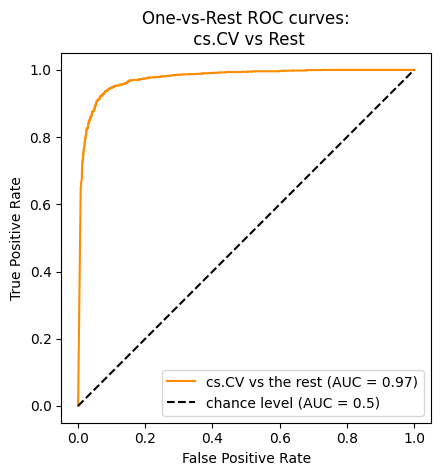

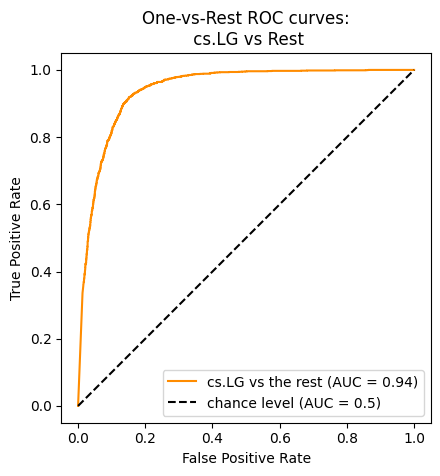

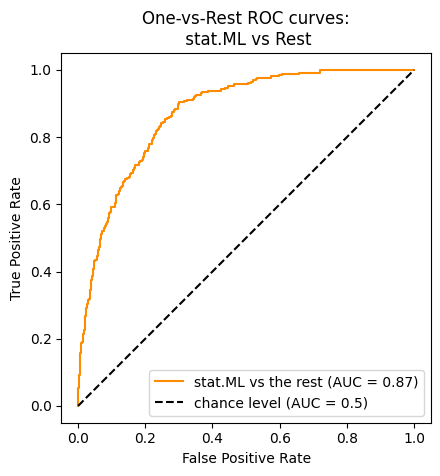

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay


label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape

for i in range(3):

  class_id = i
  class_of_interest = le.classes_[i]

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      probs[:, class_id],
      name=f"{class_of_interest} vs the rest",
      color="darkorange",
  )
  plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"One-vs-Rest ROC curves:\n {class_of_interest} vs Rest")
  plt.legend()
  plt.show()

<div dir="rtl">
<font face="XB Zar" size=4>
در این بخش confusion matrix را بدون استفاده از sklearn و به کمک matplotlib و seaborn بکشید.
</font>
</div>

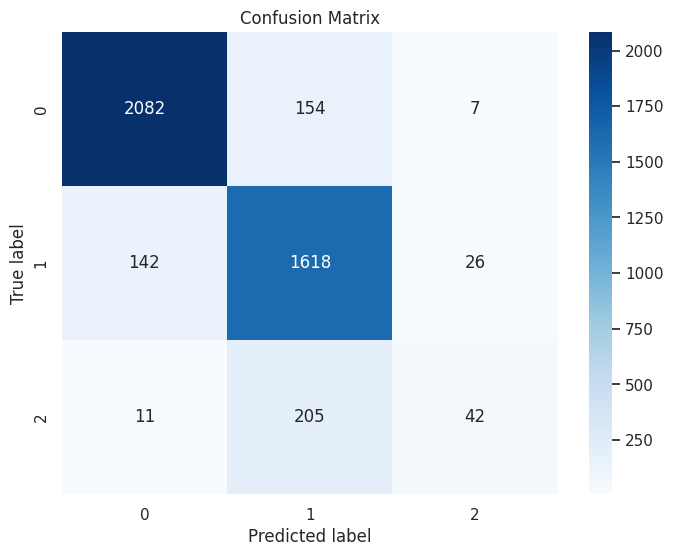

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

num_classes = len(np.unique(y_true))

# Compute the confusion 
confusion_matrix = np.bincount(np.ravel_multi_index((y_true, y_pred), (num_classes, num_classes)), minlength=num_classes**2).reshape(num_classes, num_classes)

sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با شبکه های عصبی (۳۲ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    شما یک مجموعه داده از مقالات علمی دارید، هرکدام با یک چکیده و موضوع مربوطه نشان داده شده است. هدف ساختن یک مدل شبکه عصبی است که بتواند بر اساس چکیده مقاله علمی و عنوان آن، موضوع آن را پیش بینی کند.
</font>
</div>
   

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>داده ها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
    داده‌ای که با آن در این بخش کار می‌کنید چند برچسبی می‌باشند. اما برای این بخش ما تنها برچسب اول از هر مقاله را در نظر می‌گیریم و به صورت تک برچسبی به داده‌ها نگاه می‌کنیم.
</font>
</div>
   

## Requirements

In [18]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393189 sha256=7ca16cf021298427ad8b8ede0e12d50b66c474485c03d15351522023d61ad90e
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [19]:
# You may not use all of these imports, but they are here to help you get started
# you can add cells if you needed

import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import fasttext
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from time import time
from IPython.display import display

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

In [20]:
print(df.isna().sum())
df.isna()

titles       0
summaries    0
terms        0
dtype: int64


,titles,summaries,terms
9386,False,False,False
40095,False,False,False
9315,False,False,False
19752,False,False,False
11611,False,False,False
...,...,...,...
30329,False,False,False
8987,False,False,False
48675,False,False,False
34662,False,False,False


In [21]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """
    if lower_case:
      text = text.lower()
      # remove extra whitespace
      text = " ".join(text.split())
    if punctuation_removal:
      text = text.translate (str.maketrans ('', '', string.punctuation))

    # I'm not gonna remove stop words since it barely improves performance.
      
    # todo
    normalized_tokens = word_tokenize(text)
    return normalized_tokens


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>

</font>
</div>

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# preprocess text
df['preprocessed_abstract'] = df['summaries'].apply(lambda x: preprocess_text(x))
df['preprocessed_title'] = df['titles'].apply(lambda x: preprocess_text(x))
preprocessed_total = df['preprocessed_abstract'] + df['preprocessed_title']

In [24]:
df['preprocessed_total'] = preprocessed_total

In [25]:
sentences = [' '.join(i) for i in df['preprocessed_total']]
df.head()

,titles,summaries,terms,preprocessed_abstract,preprocessed_title,preprocessed_total
9386,Implementation of Deep Neural Networks to Clas...,This paper evaluates the approach of imaging t...,"['cs.CV', 'eess.SP']","[this, paper, evaluates, the, approach, of, im...","[implementation, of, deep, neural, networks, t...","[this, paper, evaluates, the, approach, of, im..."
40095,Weakly-Supervised Action Localization and Acti...,3D Convolutional Neural Network (3D CNN) captu...,"['cs.CV', 'cs.AI', 'cs.NE']","[3d, convolutional, neural, network, 3d, cnn, ...","[weaklysupervised, action, localization, and, ...","[3d, convolutional, neural, network, 3d, cnn, ..."
9315,Off-Policy Adversarial Inverse Reinforcement L...,Adversarial Imitation Learning (AIL) is a clas...,"['cs.LG', 'cs.AI', 'cs.RO', 'stat.ML']","[adversarial, imitation, learning, ail, is, a,...","[offpolicy, adversarial, inverse, reinforcemen...","[adversarial, imitation, learning, ail, is, a,..."
19752,Describing Unseen Videos via Multi-Modal Coope...,With the arising concerns for the AI systems p...,['cs.CV'],"[with, the, arising, concerns, for, the, ai, s...","[describing, unseen, videos, via, multimodal, ...","[with, the, arising, concerns, for, the, ai, s..."
11611,Connecting Language and Vision for Natural Lan...,Vehicle search is one basic task for the effic...,['cs.CV'],"[vehicle, search, is, one, basic, task, for, t...","[connecting, language, and, vision, for, natur...","[vehicle, search, is, one, basic, task, for, t..."


In [26]:
X_train, X_test, y_train, y_test = train_test_split(sentences,y , test_size=0.33, random_state=42)

In [27]:
X_train[0]

'many realworld graphs involve different types of nodes and relations between nodes being heterogeneous by nature the representation learning of heterogeneous graphs hgs embeds the rich structure and semantics of such graphs into a lowdimensional space and facilitates various data mining tasks such as node classification node clustering and link prediction in this paper we propose a selfsupervised method that learns hg representations by relying on knowledge exchange and discovery among different hg structural semantics metapaths specifically by maximizing the mutual information of metapath representations we promote metapath information fusion and consensus and ensure that globally shared semantics are encoded by extensive experiments on node classification node clustering and link prediction tasks we show that the proposed selfsupervision both outperforms and improves competing methods by 1 and up to 10 for all tasks hemi multiview embedding in heterogeneous graphs'

## Vectorize data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر مقاله برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
    </font>
</div>

In [28]:
class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        sg = 1 if self.method == 'skipgram' else 0
        self.model = fasttext.train_unsupervised("train.txt", model = self.method)
        self.save_FastText_model()

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get 
        the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        # todo
        query_embed = None
        text = query
        if query is not None:
          query = self.preprocessor(query)


        vocab = tf_idf_vectorizer.vocabulary_
        word_indices = [vocab.get(word, -1) for word in query]

        # Filter out any words that were not found in the vocabulary
        word_indices = [idx for idx in word_indices if idx != -1]
        tf_idf_scores = tf_idf_vectorizer.transform([text]).toarray()[0][word_indices]
        tf_idf_dict = {word: score for word, score in zip(query, tf_idf_scores)}

        query_embed = np.zeros(100)
        for word in tf_idf_dict.keys():
          query_embed += self.model[word] * tf_idf_dict[word]
        return query_embed

    def save_FastText_model(self, path='/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
        self.model.save_model(path)
  
    def load_FastText_model(self, path='/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
        self.model = fasttext.load_model(path)

    def writeToFile(self, dataset):
        import os.path

        if os.path.isfile('train.txt'):
            print('File already exists.')
            return
        
        with open('train.txt', 'w') as f:
            for doc in dataset:
                f.write(' '.join(doc) + '\n')

    def prepare(self, dataset, mode, save=False):
        self.writeToFile(dataset)
        if mode == 'train':
            self.train()
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [29]:
PATH = '/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'

FastText_model = FastText(preprocessor=preprocess_text)
if os.path.isfile('/content/drive/MyDrive/MIR/Assignment 2/FastText_model.bin'):
  FastText_model.load_FastText_model(path = PATH)
else:
  FastText_model.prepare(sentences, mode='train', save=True)

In [30]:
text = 'covid'

FastText_model.model.get_nearest_neighbors(text)

[(0.8816801905632019, 'covid19'),
 (0.7332700490951538, 'pneumonia'),
 (0.7214226722717285, 'coronavirus'),
 (0.7205132842063904, 'inhospital'),
 (0.7194042205810547, 'leukemia'),
 (0.7165623307228088, 't2d'),
 (0.7163155674934387, 'prauc'),
 (0.7056013345718384, 'uk'),
 (0.7011128664016724, 'pandemic'),
 (0.6984890103340149, 'demographic')]

In [31]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit_transform(data)

In [32]:
TF_IDF_model = TF_IDF()
TF_IDF_model.fit_vectorizer(sentences)

In [33]:
text =  "backpropagation is good"

FastText_model = FastText(preprocessor=preprocess_text)
FastText_model.prepare(preprocessed_total, mode='load')
FastText_model.get_query_embedding(text, TF_IDF_model.vectorizer)

array([ 0.12604255,  0.18592904,  0.336519  , -0.32027663,  0.80946632,
       -0.31696657,  0.14191799,  0.01609238, -0.44929463,  0.07205776,
       -0.05595268,  0.09633367, -1.09680182,  0.55528862,  0.38010458,
       -0.27342846,  0.48535898,  0.07638351, -0.19171759, -0.21802063,
        0.3652493 ,  0.0493969 ,  0.06887391, -0.49746867,  0.21973312,
       -0.45578631,  0.29486218,  0.01816424,  0.02516933,  0.61532631,
       -0.20922571,  0.34630875,  0.09537803,  0.30595859, -0.14495101,
       -0.02606816, -0.3516244 , -0.1479246 ,  0.40790454, -0.04742883,
       -0.23896972,  0.0604031 ,  0.10859068, -0.04620149,  0.53315159,
       -0.41482707,  0.14299056,  0.49262001,  0.26660195,  0.09230828,
       -0.09127999,  0.09456331, -0.33189933,  0.33778555,  0.17278956,
       -0.07879848, -0.20074429,  0.43629799,  0.34132008,  0.45073036,
        0.12380222,  0.13976514,  0.27243512,  0.4443642 ,  0.47681209,
        0.28191489,  0.42653407, -0.12574325,  0.36647093,  0.39


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال به کمک مدلی که نوشته‌اید دیتای ورودی شبکه‌ی عصبی را بسازید.
    به عبارتی به ازای هر مقاله embedding مربوطه را بدست آورید.
    همچنین برچسب‌ها را نیز به عدد تبدیل کنید تا برای شبکه‌ی عصبی قابل فهم باشد.
    </font>
</div>

In [34]:
# todo
embeddings = []
for sentence in sentences:
  sentence_embed = FastText_model.get_query_embedding(sentence, TF_IDF_model.vectorizer)
  embeddings.append(sentence_embed)

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت dataset ورودی شبکه‌ی عصبی را بسازید.
     همچنین دیتا‌ را به قسمت‌های train test validation تقسیم کنید.
     80% داده برای آموزش
     10% را برای  validation
     و 10% را برای تست در نظر بگیرید.
     در نهایت dataloaderهای مربوطه را بسازید.
    </font>
</div>

In [35]:
class PapersDataSet(Dataset):
    def __init__(self, embeddings: list, labels: list):
        self.embeddings = np.array(embeddings)
        self.labels = np.array(labels)
        
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, i):
        return self.embeddings[i], self.labels[i]

In [36]:
# todo calculate the labels
labels = le.transform(y)

In [37]:
from torch.utils.data import random_split

dataset = PapersDataSet(embeddings, labels)


train_size = int(len(dataset) * 0.8)
val_size = int(len(dataset) * 0.1)
test_size = len(dataset) - train_size - val_size

# Use random_split to split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create dataloaders for the train, validation, and test sets
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

## Build model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال دراین قسمت مدل شبکه‌ی عصبی خود را تعریف کنید.
    </font>
</div>

In [38]:
import torch.nn as nn
import torch.nn.functional as F

class ClassifierModel(nn.Module):
    def __init__(self, in_features=100, num_classes=3):
        super(ClassifierModel, self).__init__()
        self.fc1 = nn.Linear(in_features, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.dropout2 = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(32, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        return out

## Train model



<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت به کمک داده‌ی آموزش و validation مدل خود را آموزش دهید.
اطلاعات مورد نیاز نظیر lossهای train و validation را ذخیره کنید تا در ادامه به کمک نمودار یادگیری مدل خود را ارزیابی کنید.
    </font>
</div>

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ClassifierModel().to(device)

In [40]:
import torch.optim as optim

# todo define the loss function and the optimizer. We suggest using Adam optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [41]:
def eval_epoch(model: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader, test_mode=False):
    """
    Evaluate the model on the given dataloader. used for validation and test
    Parameters
    ----------
    model: nn.Module
    criterion: nn.Module
    dataloader: torch.utils.data.DataLoader
    test_mode: bool
        If True, the function will print 'Test' instead of 'Validation'
    Returns
    -------
    eval_loss: float
        The loss on the given dataloader
    predicted_labels: list
        The predicted labels
    true_labels: list
        The true labels
    f1_score_macro: float
        The f1 score on the given dataloader
    """
    if test_mode:
        mode = "Test"
    else:
        mode = "Validation"
    print(f"Evaluating on {mode} set...")

    model.eval()
    eval_loss = 0.0
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(torch.float32)
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            eval_loss += loss.item() * inputs.size(0)

            _, preds = torch.max(outputs, dim=1)
            predicted_labels.extend(preds.tolist())
            true_labels.extend(labels.tolist())

    f1_score_macro = f1_score(true_labels, predicted_labels, average="macro")

    return eval_loss, predicted_labels, true_labels, f1_score_macro

In [42]:
"""
Train the model for num_epochs epochs
epoch_true and epoch_all are used to calculate the accuracy.
epoch_true is the number of correct predictions and epoch_all is the total number of predictions in the epoch
"""
num_epochs = 50

train_loss_arr, val_loss_arr = [], []
f1_macro_scores_val = []
f1_macro_scores_train = []
best_val_loss = float('inf')

for epoch in range(num_epochs):
    start_time = time()

    train_loss, val_loss = 0, 0
    epoch_all = 0
    epoch_true = 0

    model.train()
    
    predicted_labels = []
    true_labels = []

    with tqdm(enumerate(train_loader), total=len(train_loader)) as pbar:
        for i, (x, label) in pbar:
            optimizer.zero_grad()
            x = x.to(device)
            label = label.to(device)
            x = x.to(torch.float32)
            y_pred = model(x)
            loss = criterion(y_pred, label)
            loss.backward()
            _, preds = torch.max(y_pred, dim=1)
            optimizer.step()
            train_loss += loss.item() * x.size(0)

            predicted_labels.extend(preds.tolist())
            true_labels.extend(label.tolist())
  
    model.eval()
    
    f1_score_macro_train = f1_score(true_labels, predicted_labels, average="macro")
    val_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, val_loader)
    
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    train_loss_arr.append(train_loss)
    val_loss_arr.append(val_loss)
    f1_macro_scores_val.append(f1_score_macro)
    f1_macro_scores_train.append(f1_score_macro_train)
    
    end_time = time()

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f'Epoch {epoch + 1} finished in {end_time - start_time:.2f}s')

    print(f"[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}\t F1 score macro: {f1_score_macro}")

100%|██████████| 82/82 [00:03<00:00, 23.74it/s]


Evaluating on Validation set...
Epoch 1 finished in 3.50s
[Epoch 1]	Train Loss: 0.6678	Validation Loss: 0.4790	 F1 score macro: 0.5756734867860187


100%|██████████| 82/82 [00:00<00:00, 367.66it/s]


Evaluating on Validation set...
Epoch 2 finished in 0.26s
[Epoch 2]	Train Loss: 0.4964	Validation Loss: 0.4228	 F1 score macro: 0.5770809373041975


100%|██████████| 82/82 [00:00<00:00, 368.41it/s]


Evaluating on Validation set...
Epoch 3 finished in 0.26s
[Epoch 3]	Train Loss: 0.4626	Validation Loss: 0.4053	 F1 score macro: 0.5779058865601426


100%|██████████| 82/82 [00:00<00:00, 355.92it/s]


Evaluating on Validation set...
Epoch 4 finished in 0.27s
[Epoch 4]	Train Loss: 0.4443	Validation Loss: 0.4000	 F1 score macro: 0.5813573414282471


100%|██████████| 82/82 [00:00<00:00, 363.29it/s]


Evaluating on Validation set...
Epoch 5 finished in 0.26s
[Epoch 5]	Train Loss: 0.4396	Validation Loss: 0.3928	 F1 score macro: 0.5795966770110161


100%|██████████| 82/82 [00:00<00:00, 359.36it/s]


Evaluating on Validation set...
Epoch 6 finished in 0.27s
[Epoch 6]	Train Loss: 0.4277	Validation Loss: 0.3931	 F1 score macro: 0.5807485518589239


100%|██████████| 82/82 [00:00<00:00, 361.14it/s]


Evaluating on Validation set...
Epoch 7 finished in 0.26s
[Epoch 7]	Train Loss: 0.4205	Validation Loss: 0.3876	 F1 score macro: 0.5804229121346564


100%|██████████| 82/82 [00:00<00:00, 362.04it/s]


Evaluating on Validation set...
Epoch 8 finished in 0.26s
[Epoch 8]	Train Loss: 0.4184	Validation Loss: 0.3888	 F1 score macro: 0.5834419683112199


100%|██████████| 82/82 [00:00<00:00, 361.80it/s]


Evaluating on Validation set...
Epoch 9 finished in 0.27s
[Epoch 9]	Train Loss: 0.4110	Validation Loss: 0.3904	 F1 score macro: 0.5793214645789845


100%|██████████| 82/82 [00:00<00:00, 347.22it/s]


Evaluating on Validation set...
Epoch 10 finished in 0.28s
[Epoch 10]	Train Loss: 0.4168	Validation Loss: 0.3886	 F1 score macro: 0.5817980779690669


100%|██████████| 82/82 [00:00<00:00, 367.90it/s]


Evaluating on Validation set...
Epoch 11 finished in 0.26s
[Epoch 11]	Train Loss: 0.4068	Validation Loss: 0.3928	 F1 score macro: 0.578873768646693


100%|██████████| 82/82 [00:00<00:00, 374.00it/s]


Evaluating on Validation set...
Epoch 12 finished in 0.26s
[Epoch 12]	Train Loss: 0.4031	Validation Loss: 0.3921	 F1 score macro: 0.5809177872188308


100%|██████████| 82/82 [00:00<00:00, 349.37it/s]


Evaluating on Validation set...
Epoch 13 finished in 0.28s
[Epoch 13]	Train Loss: 0.4018	Validation Loss: 0.3879	 F1 score macro: 0.5911414744463395


100%|██████████| 82/82 [00:00<00:00, 349.37it/s]


Evaluating on Validation set...
Epoch 14 finished in 0.27s
[Epoch 14]	Train Loss: 0.4010	Validation Loss: 0.3869	 F1 score macro: 0.5836708149245199


100%|██████████| 82/82 [00:00<00:00, 370.22it/s]


Evaluating on Validation set...
Epoch 15 finished in 0.26s
[Epoch 15]	Train Loss: 0.3977	Validation Loss: 0.3947	 F1 score macro: 0.5808997683389671


100%|██████████| 82/82 [00:00<00:00, 366.54it/s]


Evaluating on Validation set...
Epoch 16 finished in 0.26s
[Epoch 16]	Train Loss: 0.3951	Validation Loss: 0.4039	 F1 score macro: 0.5858932108547643


100%|██████████| 82/82 [00:00<00:00, 372.97it/s]


Evaluating on Validation set...
Epoch 17 finished in 0.26s
[Epoch 17]	Train Loss: 0.3856	Validation Loss: 0.3820	 F1 score macro: 0.5824675244210457


100%|██████████| 82/82 [00:00<00:00, 373.79it/s]


Evaluating on Validation set...
Epoch 18 finished in 0.26s
[Epoch 18]	Train Loss: 0.3846	Validation Loss: 0.3808	 F1 score macro: 0.5922891453472697


100%|██████████| 82/82 [00:00<00:00, 369.19it/s]


Evaluating on Validation set...
Epoch 19 finished in 0.26s
[Epoch 19]	Train Loss: 0.3877	Validation Loss: 0.3840	 F1 score macro: 0.599358340524832


100%|██████████| 82/82 [00:00<00:00, 343.88it/s]


Evaluating on Validation set...
Epoch 20 finished in 0.28s
[Epoch 20]	Train Loss: 0.3906	Validation Loss: 0.3863	 F1 score macro: 0.583956707764624


100%|██████████| 82/82 [00:00<00:00, 348.14it/s]


Evaluating on Validation set...
Epoch 21 finished in 0.28s
[Epoch 21]	Train Loss: 0.3848	Validation Loss: 0.3860	 F1 score macro: 0.5845654808294308


100%|██████████| 82/82 [00:00<00:00, 360.72it/s]


Evaluating on Validation set...
Epoch 22 finished in 0.27s
[Epoch 22]	Train Loss: 0.3804	Validation Loss: 0.3804	 F1 score macro: 0.598924593971584


100%|██████████| 82/82 [00:00<00:00, 379.17it/s]


Evaluating on Validation set...
Epoch 23 finished in 0.26s
[Epoch 23]	Train Loss: 0.3760	Validation Loss: 0.4314	 F1 score macro: 0.5732499846317883


100%|██████████| 82/82 [00:00<00:00, 364.76it/s]


Evaluating on Validation set...
Epoch 24 finished in 0.27s
[Epoch 24]	Train Loss: 0.3730	Validation Loss: 0.3860	 F1 score macro: 0.5844402446998128


100%|██████████| 82/82 [00:00<00:00, 344.21it/s]


Evaluating on Validation set...
Epoch 25 finished in 0.29s
[Epoch 25]	Train Loss: 0.3750	Validation Loss: 0.3888	 F1 score macro: 0.5847667012674125


100%|██████████| 82/82 [00:00<00:00, 251.69it/s]


Evaluating on Validation set...
Epoch 26 finished in 0.38s
[Epoch 26]	Train Loss: 0.3713	Validation Loss: 0.3902	 F1 score macro: 0.5847759336522865


100%|██████████| 82/82 [00:00<00:00, 260.76it/s]


Evaluating on Validation set...
Epoch 27 finished in 0.37s
[Epoch 27]	Train Loss: 0.3701	Validation Loss: 0.4012	 F1 score macro: 0.5809398886949816


100%|██████████| 82/82 [00:00<00:00, 254.55it/s]


Evaluating on Validation set...
Epoch 28 finished in 0.38s
[Epoch 28]	Train Loss: 0.3651	Validation Loss: 0.4070	 F1 score macro: 0.5793026517428291


100%|██████████| 82/82 [00:00<00:00, 262.07it/s]


Evaluating on Validation set...
Epoch 29 finished in 0.37s
[Epoch 29]	Train Loss: 0.3717	Validation Loss: 0.4156	 F1 score macro: 0.5711105218093643


100%|██████████| 82/82 [00:00<00:00, 252.99it/s]


Evaluating on Validation set...
Epoch 30 finished in 0.37s
[Epoch 30]	Train Loss: 0.3614	Validation Loss: 0.3925	 F1 score macro: 0.5842934842934843


100%|██████████| 82/82 [00:00<00:00, 262.14it/s]


Evaluating on Validation set...
Epoch 31 finished in 0.37s
[Epoch 31]	Train Loss: 0.3525	Validation Loss: 0.3992	 F1 score macro: 0.5805603960943767


100%|██████████| 82/82 [00:00<00:00, 251.11it/s]


Evaluating on Validation set...
Epoch 32 finished in 0.38s
[Epoch 32]	Train Loss: 0.3677	Validation Loss: 0.3937	 F1 score macro: 0.6072349646662095


100%|██████████| 82/82 [00:00<00:00, 275.15it/s]


Evaluating on Validation set...
Epoch 33 finished in 0.35s
[Epoch 33]	Train Loss: 0.3593	Validation Loss: 0.3892	 F1 score macro: 0.6018499328343888


100%|██████████| 82/82 [00:00<00:00, 266.19it/s]


Evaluating on Validation set...
Epoch 34 finished in 0.37s
[Epoch 34]	Train Loss: 0.3596	Validation Loss: 0.4080	 F1 score macro: 0.5934545365097463


100%|██████████| 82/82 [00:00<00:00, 242.99it/s]


Evaluating on Validation set...
Epoch 35 finished in 0.40s
[Epoch 35]	Train Loss: 0.3630	Validation Loss: 0.4047	 F1 score macro: 0.5895401586403285


100%|██████████| 82/82 [00:00<00:00, 247.17it/s]


Evaluating on Validation set...
Epoch 36 finished in 0.39s
[Epoch 36]	Train Loss: 0.3523	Validation Loss: 0.3931	 F1 score macro: 0.5843534908556935


100%|██████████| 82/82 [00:00<00:00, 251.51it/s]


Evaluating on Validation set...
Epoch 37 finished in 0.39s
[Epoch 37]	Train Loss: 0.3516	Validation Loss: 0.3942	 F1 score macro: 0.5787904649951959


100%|██████████| 82/82 [00:00<00:00, 232.29it/s]


Evaluating on Validation set...
Epoch 38 finished in 0.44s
[Epoch 38]	Train Loss: 0.3479	Validation Loss: 0.4152	 F1 score macro: 0.5822424486016494


100%|██████████| 82/82 [00:00<00:00, 283.27it/s]


Evaluating on Validation set...
Epoch 39 finished in 0.34s
[Epoch 39]	Train Loss: 0.3466	Validation Loss: 0.4132	 F1 score macro: 0.6082446959329493


100%|██████████| 82/82 [00:00<00:00, 350.99it/s]


Evaluating on Validation set...
Epoch 40 finished in 0.28s
[Epoch 40]	Train Loss: 0.3464	Validation Loss: 0.3978	 F1 score macro: 0.5875445889261834


100%|██████████| 82/82 [00:00<00:00, 351.51it/s]


Evaluating on Validation set...
Epoch 41 finished in 0.27s
[Epoch 41]	Train Loss: 0.3389	Validation Loss: 0.4087	 F1 score macro: 0.5845222250461846


100%|██████████| 82/82 [00:00<00:00, 347.89it/s]


Evaluating on Validation set...
Epoch 42 finished in 0.29s
[Epoch 42]	Train Loss: 0.3373	Validation Loss: 0.4058	 F1 score macro: 0.5843229341384323


100%|██████████| 82/82 [00:00<00:00, 385.45it/s]


Evaluating on Validation set...
Epoch 43 finished in 0.25s
[Epoch 43]	Train Loss: 0.3387	Validation Loss: 0.4075	 F1 score macro: 0.5837074878634158


100%|██████████| 82/82 [00:00<00:00, 364.34it/s]


Evaluating on Validation set...
Epoch 44 finished in 0.26s
[Epoch 44]	Train Loss: 0.3439	Validation Loss: 0.4193	 F1 score macro: 0.602183818943923


100%|██████████| 82/82 [00:00<00:00, 367.74it/s]


Evaluating on Validation set...
Epoch 45 finished in 0.26s
[Epoch 45]	Train Loss: 0.3332	Validation Loss: 0.4024	 F1 score macro: 0.5800209706012103


100%|██████████| 82/82 [00:00<00:00, 348.39it/s]


Evaluating on Validation set...
Epoch 46 finished in 0.27s
[Epoch 46]	Train Loss: 0.3373	Validation Loss: 0.4212	 F1 score macro: 0.5779412797450234


100%|██████████| 82/82 [00:00<00:00, 360.55it/s]


Evaluating on Validation set...
Epoch 47 finished in 0.27s
[Epoch 47]	Train Loss: 0.3393	Validation Loss: 0.4134	 F1 score macro: 0.582606094998543


100%|██████████| 82/82 [00:00<00:00, 346.07it/s]


Evaluating on Validation set...
Epoch 48 finished in 0.27s
[Epoch 48]	Train Loss: 0.3325	Validation Loss: 0.4036	 F1 score macro: 0.6207812865776897


100%|██████████| 82/82 [00:00<00:00, 351.54it/s]


Evaluating on Validation set...
Epoch 49 finished in 0.27s
[Epoch 49]	Train Loss: 0.3371	Validation Loss: 0.4128	 F1 score macro: 0.580743248418376


100%|██████████| 82/82 [00:00<00:00, 365.52it/s]

Evaluating on Validation set...
Epoch 50 finished in 0.26s
[Epoch 50]	Train Loss: 0.3345	Validation Loss: 0.4336	 F1 score macro: 0.584116642623282


In [43]:
model = ClassifierModel()
model.load_state_dict(torch.load("best_model.pth"))
model = model.to(device)

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار loss بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

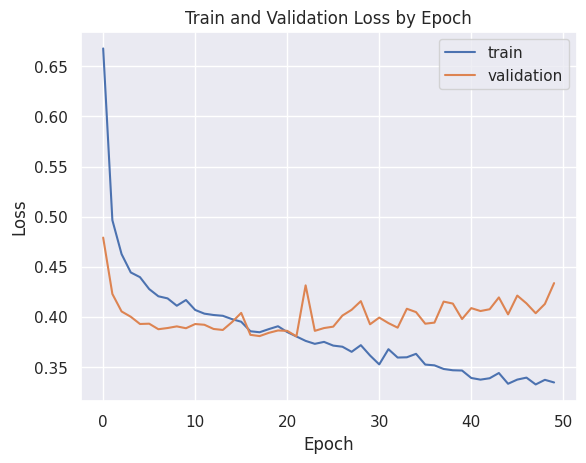

In [44]:
plt.plot(train_loss_arr, label='train')
plt.plot(val_loss_arr, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss by Epoch')
plt.legend()
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
نمودار f1 score بر حسب epoch را برای داده‌های train و validation رسم کنید.
    </font>
</div>

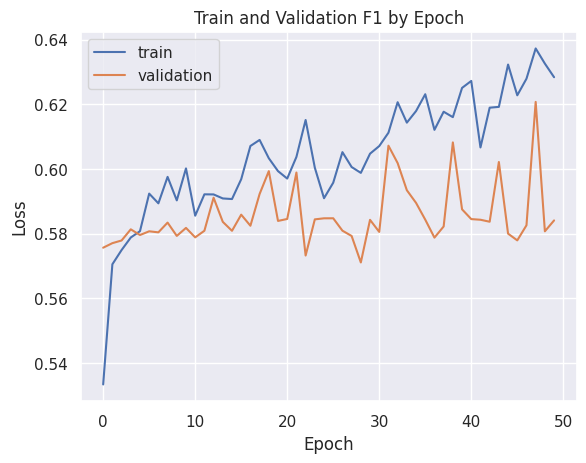

In [45]:
plt.plot(f1_macro_scores_train, label='train')
plt.plot(f1_macro_scores_val, label='validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation F1 by Epoch')
plt.legend()
plt.show()

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به مدلتان دهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>Loss</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

Evaluating on Test set...
Accuracy: 0.8545
Loss: 0.3720
F1-Macro: 0.5936
F1-Micro: 0.8545


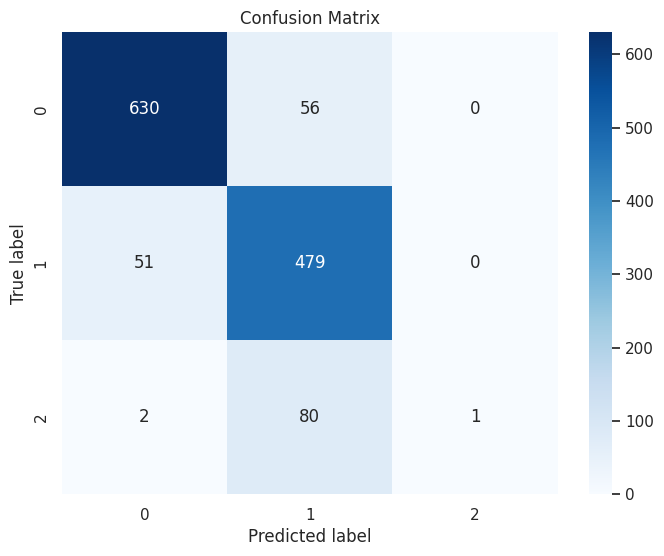

Macro-average precision: 0.9004
Macro-average recall: 0.6114
Micro-average precision: 0.8545
Micro-average recall: 0.8545


In [46]:
# todo: evaluate the model on the test set
# print the required metrics
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
np.set_printoptions(suppress=True)

model.eval()
eval_loss, predicted_labels, true_labels, f1_score_macro = eval_epoch(model, criterion, test_loader, test_mode=True)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

# Loss
print(f"Loss: {eval_loss / len(test_loader.dataset):.4f}")

# F1-Macro
print(f"F1-Macro: {f1_score_macro:.4f}")

# F1-Micro
f1_score_micro = f1_score(true_labels, predicted_labels, average='micro')
print(f"F1-Micro: {f1_score_micro:.4f}")

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# plot the confusion matrix using seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Macro-average precision and recall
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
print(f"Macro-average precision: {precision_macro:.4f}")
print(f"Macro-average recall: {recall_macro:.4f}")

# Micro-average precision and recall
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
print(f"Micro-average precision: {precision_micro:.4f}")
print(f"Micro-average recall: {recall_micro:.4f}")

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [47]:
def predict(x):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    # todo
    embed = FastText_model.get_query_embedding(x, TF_IDF_model.vectorizer)
    predicted_class = model(torch.Tensor(embed).unsqueeze(0).to(device))
    _, preds = torch.max(predicted_class, dim=1)
    return le.classes_[preds[0].item()]

In [48]:
predict('Super resolution is the task of maintaining the original quality of the image, while also increasing its resolution.')

'cs.CV'

In [49]:
PATH = "nn_fasttext_model.pt"

# Save
torch.save(model, PATH)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    <b>دسته بندی با استفاده از مدل های زبانی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
     <br>
در این قسمت قرار است تا به کمک language modelهای از پیش آموزش شده 
و fine-tune کردن آن‌ها طبقه‌بند خودمان را درست کنیم.
</font>
</div>
   

## Requirements

In [50]:
import torch
import nltk
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import string
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

## Read and preprocess data


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
در ابتدا دیتا را لود کنید. آن را تمیز کنید یا به عبارتی EDA مناسب در حدی که داده‌های null یا موارد این‌چنینی نداشته باشیم، بر روی آن انجام دهید.
 پیش پردازش‌های مورد نیاز که در فاز قبل با آن آشنا شدید را روی داده انجام دهید.
    برای کتگوری هر مقاله برچسب اول آن را از دیتاست در نظر بگیرید.
</font>
</div>

## Prepare data for model


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
     در این قسمت برچسب‌ها و متن‌ها را برای مدل آماده کنید.
     برای متن هم عنوان و هم چکیده را در نظر بگیرید و این دو را به هم بچسبانید.
     به صورت رندم، ۱۰۰۰۰ داده را برای تمرین انتخاب کنید.
     همچنین جدا‌سازی داده‌ها را انجام دهید.
     در این بخش کافی است تا داده‌ها را به دو دسته‌ی آموزش و تست تقسیم کنید. 80% داده‌ها برای آموزش و 20% را برای تست قرار دهید.
    </font>
</div>

In [51]:
# todo
# calculate labels
# calulcate final texts
# select 10000 data randomly
# split data into train and test


random_state = 1
X_train, X_test, y_train, y_test = [None] * 4

## Transformer based classification


<div dir="rtl">
<font face="XB Zar" size=5>
</font>
<font face="XB Zar" size=3>
     <br>
مدلی که در این قسمت استفاده می‌کنیم مدل معروف bert می‌باشد.
    برای این کار از کتابخانه transformers استفاده می‌کنیم.
    مدل و tokenizer مربوطه را لود کنید.
    <br><b><u>
    به کمک داده‌های قسمت قبل و به کمک 
    Trainer
    مربوط به کتاب‌خانه‌ی transformers عملیات fine-tune را انجام دهید.
    <br>
    همچنین یکبار وزن‌های مدل برت را فریز کنید و فقط دسته‌بند مربوطه را آموزش دهید.
    </u></b><br>
    مطالعه‌ی بیشتر کتاب‌خانه‌ی transformers بسیار توصیه می‌شود.
    </font>
</div>

In [52]:
MODEL_NAME = "bert-base-uncased"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# todo 
from transformers import BertTokenizer, BertForSequenceClassification

# you can add more cells here if you need
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

tokenizer =  BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [53]:
# todo
train_encodings = None
test_encodings = None

train_encodings, test_encodings, y_train, y_test = train_test_split(sentences,le.transform(y) , test_size=0.2, random_state=42)

In [54]:
# todo
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        text = self.encodings[idx]
        label = self.labels[idx]
        encoding = tokenizer.encode_plus(text, add_special_tokens=True, return_tensors='pt', padding='max_length', truncation=True, max_length=256)
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(label)} 

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, y_train)
test_dataset = CustomDataset(test_encodings, y_test)


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [55]:
def train_epoch(pbar, model, optimizer, criteration):
    model.train()
    running_loss = 0
    for batch in pbar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids = input_ids, attention_mask = attention_mask, labels = labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        pbar.set_postfix({'Loss': loss.item()})
        running_loss += loss.item()
    
    return running_loss / len(pbar)

In [ ]:
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = torch.nn.CrossEntropyLoss()

model.to(device)

from tqdm import tqdm

losses = []

for epoch in range(3):
    model.train()
    running_loss = 0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}')
    
    running_loss = train_epoch(pbar, model, optimizer, loss_fn)
    losses.append(running_loss)
    print(f'Training Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 1: 100%|██████████| 863/863 [10:46<00:00,  1.33it/s, Loss=0.729]


Training Loss: 0.4347


Epoch 2: 100%|██████████| 863/863 [10:43<00:00,  1.34it/s, Loss=0.211]


Training Loss: 0.4347


Epoch 3: 100%|██████████| 863/863 [10:44<00:00,  1.34it/s, Loss=0.141]

Training Loss: 0.4347


In [ ]:
model.eval()
val_loss = 0
val_acc = 0
with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Epoch {epoch+1}')
      for batch in pbar:
    # for batch in tqdm(val_loader):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        val_acc += (outputs.logits.argmax(dim=1) == labels).sum().item()

val_loss /= len(val_loader)
val_acc /= len(val_loader.dataset)

losses.append(val_loss)
print(f'Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_acc:.4f}')

Epoch 1: 100%|██████████| 216/216 [01:07<00:00,  3.20it/s]

Validation Loss: 0.3279 | Validation Accuracy: 0.8954


In [56]:
model_2 = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)

for name, param in model_2.named_parameters():
    if name.startswith('bert'):
        param.requires_grad = False

model_2.classifier = nn.Sequential(
    nn.Linear(model.config.hidden_size, 128),
    nn.ReLU(),
    nn.Linear(128, 3)
)
model_2 = model_2.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
optimizer2 = AdamW(model_2.parameters(), lr=2e-5)
loss_fn2 = torch.nn.CrossEntropyLoss()

losses = []

for epoch in range(12):
    model_2.train()
    running_loss = 0
    pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}')
    running_loss = train_epoch(pbar, model_2, optimizer2, loss_fn2)
    
    losses.append(running_loss)
    print(f'Training Loss: {losses[-1]:.4f}')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Training Loss: 0.8638


Epoch 2: 100%|██████████| 863/863 [04:20<00:00,  3.31it/s, Loss=0.568]


Training Loss: 0.8147


Epoch 3: 100%|██████████| 863/863 [04:23<00:00,  3.28it/s, Loss=0.759]


Training Loss: 0.7774


Epoch 4: 100%|██████████| 863/863 [04:25<00:00,  3.26it/s, Loss=0.678]


Training Loss: 0.7456


Epoch 5: 100%|██████████| 863/863 [04:21<00:00,  3.30it/s, Loss=0.877]


Training Loss: 0.7175


Epoch 6: 100%|██████████| 863/863 [04:22<00:00,  3.29it/s, Loss=0.667]


Training Loss: 0.6948


Epoch 7: 100%|██████████| 863/863 [04:22<00:00,  3.29it/s, Loss=0.55]


Training Loss: 0.6778


Epoch 8: 100%|██████████| 863/863 [04:24<00:00,  3.26it/s, Loss=0.429]


Training Loss: 0.6627


Epoch 9: 100%|██████████| 863/863 [04:24<00:00,  3.27it/s, Loss=0.885]


Training Loss: 0.6509


Epoch 10: 100%|██████████| 863/863 [04:22<00:00,  3.29it/s, Loss=0.357]


Training Loss: 0.6366


Epoch 11: 100%|██████████| 863/863 [04:22<00:00,  3.28it/s, Loss=0.531]


Training Loss: 0.6284


Epoch 12: 100%|██████████| 863/863 [04:22<00:00,  3.29it/s, Loss=0.49]

Training Loss: 0.6219


In [57]:
import os 

def save(PATH, model):
    torch.save(model.state_dict(), PATH)

def load_weights(PATH, model):
    model.load_state_dict(torch.load(PATH))
    return model

PATH = "drive/MyDrive/MIR/Assignment 2/BERT.pth"
if os.path.exists(PATH):
    model = load_weights(PATH, model)
else:
    save(PATH, model)


PATH = "/content/drive/MyDrive/MIR/Assignment 2/BERT_freeze.pth"
if os.path.exists(PATH):
    model_2 = load_weights(PATH, model_2)
else:
    save(PATH, model_2)

## Evaluate model

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
حال داده‌ی test را به هر دو مدل بدهید و بر اساس خروجی‌ها موارد زیر را به دست آورید.
    <br>
    <br>
    <ul>
        <li>accuracy</li>
        <li>F1-Macro</li>
        <li>F1-Micro</li>
        <li>Confusion matrix</li>
        <li>Macro-average precision</li>
        <li>Macro-average recall</li>
        <li>Micro-average precision</li>
        <li>Micro-average recall</li>
    </ul>
    </font>
</div>

# Fine tuned BERT without freezing weights

In [58]:
gt_labels = []

y_pred_transformers = []
y_pred_transformers_2 = []

In [59]:
model.eval()
model = model.to(device)
val_loss = 0
val_acc = 0

with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Validation Phase')
      for batch in pbar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        gt_labels += labels
        y_pred_transformers += outputs.logits.argmax(dim=1)

val_loss /= len(val_loader)

Validation Phase: 100%|██████████| 163/163 [00:48<00:00,  3.36it/s]


Accuracy: 0.9088
Loss: 0.2839
F1-Macro: 0.7365
F1-Micro: 0.9088


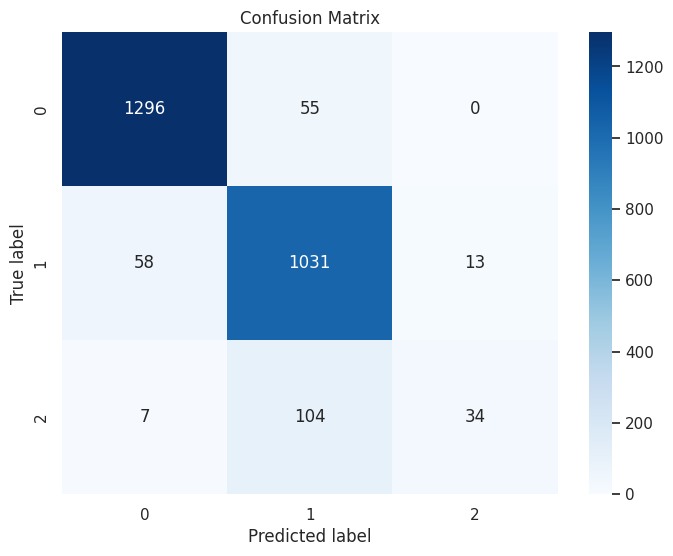

Macro-average precision: 0.8473
Macro-average recall: 0.7098
Micro-average precision: 0.9088
Micro-average recall: 0.9088


In [60]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
np.set_printoptions(suppress=True)

# Accuracy

gt_labels = [x.detach().cpu() for x in gt_labels]
y_pred_transformers = [x.detach().cpu() for x in y_pred_transformers]
# y_pred_trasnformers = y_pred_transformers.detach().cpu()

accuracy = accuracy_score(gt_labels, y_pred_transformers)
f1_score_macro = f1_score(gt_labels, y_pred_transformers, average='macro')

print(f"Accuracy: {accuracy:.4f}")

# Loss
print(f"Loss: {val_loss:.4f}")

# F1-Macro
print(f"F1-Macro: {f1_score_macro:.4f}")

# F1-Micro
f1_score_micro = f1_score(gt_labels, y_pred_transformers, average='micro')
print(f"F1-Micro: {f1_score_micro:.4f}")

# Confusion matrix
cm = confusion_matrix(gt_labels, y_pred_transformers)

# plot the confusion matrix using seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Macro-average precision and recall
precision_macro = precision_score(gt_labels, y_pred_transformers, average='macro')
recall_macro = recall_score(gt_labels, y_pred_transformers, average='macro')
print(f"Macro-average precision: {precision_macro:.4f}")
print(f"Macro-average recall: {recall_macro:.4f}")

# Micro-average precision and recall
precision_micro = precision_score(gt_labels, y_pred_transformers, average='micro')
recall_micro = recall_score(gt_labels, y_pred_transformers, average='micro')
print(f"Micro-average precision: {precision_micro:.4f}")
print(f"Micro-average recall: {recall_micro:.4f}")

# Fine tuned BERT with freezing weights

In [61]:
gt_labels = []

y_pred_transformers = []
y_pred_transformers_2 = []

In [62]:
model_2.eval()

model_2 = model_2.to(device)

val_loss = 0
val_acc = 0

with torch.no_grad():
      pbar = tqdm(val_loader, desc=f'Validation Phase')
      for batch in pbar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model_2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        val_loss += outputs.loss.item()
        gt_labels += labels
        y_pred_transformers_2 += outputs.logits.argmax(dim=1)

val_loss /= len(val_loader)

Validation Phase: 100%|██████████| 163/163 [00:58<00:00,  2.80it/s]


Accuracy: 0.8052
Loss: 0.5567
F1-Macro: 0.5507
F1-Micro: 0.8052


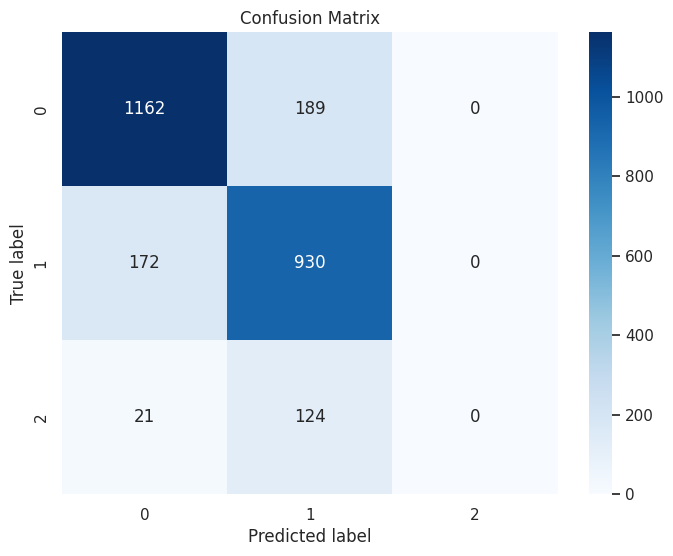

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro-average precision: 0.5353
Macro-average recall: 0.5680
Micro-average precision: 0.8052
Micro-average recall: 0.8052


In [63]:
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score
np.set_printoptions(suppress=True)

# Accuracy

gt_labels = [x.detach().cpu() for x in gt_labels]
y_pred_transformers = [x.detach().cpu() for x in y_pred_transformers_2]
# y_pred_trasnformers = y_pred_transformers.detach().cpu()

accuracy = accuracy_score(gt_labels, y_pred_transformers)
f1_score_macro = f1_score(gt_labels, y_pred_transformers, average='macro')

print(f"Accuracy: {accuracy:.4f}")

# Loss
print(f"Loss: {val_loss:.4f}")

# F1-Macro
print(f"F1-Macro: {f1_score_macro:.4f}")

# F1-Micro
f1_score_micro = f1_score(gt_labels, y_pred_transformers, average='micro')
print(f"F1-Micro: {f1_score_micro:.4f}")

# Confusion matrix
cm = confusion_matrix(gt_labels, y_pred_transformers)

# plot the confusion matrix using seaborn
sns.set()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Macro-average precision and recall
precision_macro = precision_score(gt_labels, y_pred_transformers, average='macro')
recall_macro = recall_score(gt_labels, y_pred_transformers, average='macro')
print(f"Macro-average precision: {precision_macro:.4f}")
print(f"Macro-average recall: {recall_macro:.4f}")

# Micro-average precision and recall
precision_micro = precision_score(gt_labels, y_pred_transformers, average='micro')
recall_micro = recall_score(gt_labels, y_pred_transformers, average='micro')
print(f"Micro-average precision: {precision_micro:.4f}")
print(f"Micro-average recall: {recall_micro:.4f}")

<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
     نتایج به دست آمده برای دو مدل آموزش داده شده را مقایسه کنید و سپس نتایج مدل بهتر را با خروجی‌های fasttext که در قسمت قبل استخراج کردید نیز مقایسه کنید و تحلیل‌های خود را بنویسید.
    <br>
    <br>
    </font>
</div>

<div dir="rtl">
<font face="XB Zar" size=3>
پاسخ خود را در این قسمت بنویسید
</font>
</div>

1. FastText with MLP:
   - The obtained accuracy of 85% suggests that FastText embeddings, along with a single MLP, performed reasonably well on the classification task. However, it might struggle with capturing more nuanced semantic information present in the data, since the embeddings captured by fasttext are context independent.

2. Pretrained BERT:
   - Achieving 91% accuracy with pretrained BERT indicates that the model effectively learned the representations and generalizations required for the classification task, leveraging its contextual understanding and transformer architecture. It is however possible to get a higher accuracy if we leverage more advanced preprocessing techniques and some tweaking in the model.

3. Frozen BERT with fine-tuned classifier:
   - By freezing the majority of the BERT weights, the model retains its linguistic knowledge while allowing the classifier to adapt to the specific classification task.
   - The lower accuracy of 80.1% in this case suggests that the frozen BERT might not have been able to capture all the necessary task-specific nuances or may have encountered difficulties in fine-tuning the classifier effectively. Again, we can somewhat mitigate the issue by using transfer learning incorprating adapter modules as it is described in the paper **Parameter-Efficient Transfer Learning for NLP**.

Based on the provided accuracies, the pretrained BERT approach yielded the highest accuracy of 91%, indicating its superiority over the other methods. The pretrained BERT model benefits from its extensive language knowledge, contextual understanding, and transformer architecture, enabling it to excel in a wide range of natural language understanding tasks.


<div dir="rtl">
<font face="XB Zar" size=3>
     <br>
در نهایت در این قسمت تابعی بنویسید که یک متن را به عنوان ورودی بگیرد و بر اساس مدلتان برچسب‌ مناسب را به آن بدهد.
    <br>
    <br>
    </font>
</div>
    

In [64]:
def predict(x, model):
    """
    predict the class code of a given query
    :param x: the query
    :return: the class of the query in the form of real strings.
    """
    encoding = tokenizer.encode_plus(x, add_special_tokens=True, return_tensors='pt'
    , padding='max_length', truncation=True, max_length=256).to(device)
    
    logits = model(**encoding).logits
    predicted_class = logits.argmax().item()
    return le.classes_[predicted_class]

In [65]:
predict('Computer vision is better than classic machine learning', model)

'cs.CV'

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جستجو و بازیابی اسناد در دسته‌های مختلف</b>
    </h2>
</font>
<font face="XB Zar" size=4>
در این بخش می‌خواهیم به تابع search مربوط به فاز قبل قابلیتی اضافه کنیم که بر اساس آن بتوان جستجو و بازیابی پرسمان را به یک دسته خاص محدود کرد و یا مشخص کرد که جستجو بر روی تمام اسناد انجام شود. همانند فاز قبل:
<br>
 پرسمانی که از کاربر می‌گیرید را در مجموعه اسناد نمایه شده جست و جو کنید. توجه داشته باشید که جست و جویی که انجام می‌دهید هم باید در عنوان مقاله و هم در چکیده آن انجام شود. در نهایت، اسناد باید به ترتیب امتیاز نهایی‌شان برگردانده شوند. امتیاز نهایی هر سند نیز از جمع وزن‌دار امتیاز جستجو در عنوان و جستجو در چکیده مقاله به دست می‌آید.
<br>
ورودی‌های تابع search در این فاز، همانند فاز قبل است؛ تنها ورودی category به آن اضافه شده است. در صورتی که ورودی category برابر all باشد، جستجو در تمامی اسناد انجام می‌شود. در صورتی که category برابر نام یک دسته باشد، جستجو تنها در دسته گفته شده انجام می‌شود.
<br>
(برای این قسمت از کدهایی که در فاز قبل زده‌اید استفاده کنید و قابلیت گفته شده را به آن اضافه کنید.)
</font>
</div>

In [67]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords


class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

stopwords_set = set(stopwords.words('english'))

def print_single(text, query, firstk = 20):

    global stopwords_set

    for word in text[:firstk]:
        if len(preprocess_text(word)) != 0 and preprocess_text(word)[0] in query and word not in stopwords_set:
            print(bcolors.OKGREEN + bcolors.BOLD + word + bcolors.ENDC, end = ' ')
        else:
            print(word, end = ' ')
    if len(text) > firstk:
        print('...')
    print()


def pretty_print(results, title_query, abstract_query, firstk = 50):
    
    global doc_index

    title_query = preprocess_text(title_query)
    abstract_query = preprocess_text(abstract_query)

    for idx, result in enumerate(results):
        # doc = df[df['paperId'] == result].iloc[0]
        doc = df.loc[df.index == result[0]]
        # print(doc['titles'].item())
        print(bcolors.BOLD + f"PaperId- {result[0]}" + bcolors.ENDC)
        print(bcolors.BOLD + f"{idx}- Category: {doc_index[result[0]]['class']}" + bcolors.ENDC)
        print(bcolors.BOLD + f"{idx}- Title: " + bcolors.ENDC)
        print_single(doc['titles'].item().split(), title_query, firstk)
        print()
        print(bcolors.BOLD + f"{idx}- Abstract: " + bcolors.ENDC)
        if type(doc['summaries'].item()) == str:
            print_single(doc['summaries'].item().split(), abstract_query, firstk)
        else:
            print(bcolors.FAIL + "No summaries available" + bcolors.ENDC)
        print()

In [69]:
import ast


def construct_index():
    
    index = {}
    doc_index = {}

    avg_title = 0
    avg_abstract = 0
    
    for i, row in df.iterrows():
        paper_id = row.name
        if paper_id not in doc_index:
            doc_index[paper_id] = {}
            doc_index[paper_id]['class'] = ast.literal_eval(row['terms'])[0]
        title = row['preprocessed_title']
        abstract = row['preprocessed_abstract']

        avg_title += len(title)
        avg_abstract += len(abstract)


        '''
            0 -> title
            1 -> abstract

            token = [
            title -> [paper_id, length, [positions]],
            abstract -> [paper_id, length, [positions]]]
            
        '''
        
        for i, token in enumerate(title):
            if token not in index:
                index[token] = []
            if len(index[token]) == 0 or index[token][-1][0] != paper_id:
                index[token].append([paper_id,[len(title), 0],[len(abstract), 0]])
            title_list = index[token][-1][1]
            title_list[1] += 1


        for i, token in enumerate(abstract):
            if token not in index:
                index[token] = []
            if len(index[token]) == 0 or index[token][-1][0] != paper_id:
                index[token].append([paper_id,[len(title), 0],[len(abstract), 0]])
            abstract_list = index[token][-1][2]
            abstract_list[1] += 1

    avg_title /= len(doc_index)
    avg_abstract /= len(doc_index)
                
    return index, doc_index, [avg_title, avg_abstract]

In [70]:
index, doc_index, avg_lens = construct_index()

In [71]:
def get_idf(token, type):
    global index
    sum = 0
    if token not in index:
        print(token)
        return 0
    for doc in index[token]:
        if doc[type + 1][1] >= 1:
            sum += 1
    
    return sum

def search_using_okapi(query, type):
    global index, doc_index


    k1 = 1.2
    b = 0.75

    query = preprocess_text(query)
    N = len(doc_index)

    q_w = {}
    for token in query:
        if token not in q_w:
            q_w[token] = 0
        idf = get_idf(token, type)
        q_w[token] = np.log((N - idf + 0.5) / (idf + 0.5) + 1)
     
    doc_weights = {}
    for token in query:
        for doc in index[token]:
            if doc[0] not in doc_weights:
                doc_weights[doc[0]] = {}
            fq = doc[type + 1][1]
            D = doc[type + 1][-1]
            doc_weights[doc[0]][token] = (fq * (k1 + 1)) / (fq + k1 * (1 - b + b * D / avg_lens[type]))

    
    doc_scores = {}

    for doc in doc_weights:
        doc_scores[doc] = 0
        for token in doc_weights[doc]:
            doc_scores[doc] += q_w[token] * doc_weights[doc][token]

    return doc_scores



def search_query(query, type, normalize = True):

    global index, doc_index

    query = preprocess_text(query)
    N = len(doc_index)

    # QUERY TF
    q_w = {}
    for token in query:
        if token not in q_w:
            q_w[token] = 1
        else:
            q_w[token] += 1

    for token in q_w:
        q_w[token] = 1 + np.log10(q_w[token])

    # QUERY IDF
    for token in query:
        idf = get_idf(token, type)
        if idf == 0:
            q_w[token] = 0
        else:
            q_w[token] *= np.log10(N / idf)
    
    doc_weights = {}
    for token in query:
        if token not in index:
            continue
        for doc in index[token]:
            if doc[0] not in doc_weights:
                doc_weights[doc[0]] = {}
            doc_weights[doc[0]][token] = 0 if doc[type+1][1] == 0 else 1 + np.log10(doc[type + 1][1])


    doc_scores = {}

    # No need to normalize query weights
    if normalize:
        for doc in doc_weights:
            keys = list(doc_weights[doc].keys())
            scores = np.array(list(doc_weights[doc].values()))
            if np.sqrt(np.sum(scores ** 2)) != 0:
                scores = scores / np.sqrt(np.sum(scores**2))
            doc_weights[doc] = dict(zip(keys, scores))

    for doc in doc_weights:
        doc_scores[doc] = 0
        for token in doc_weights[doc]:
            doc_scores[doc] += q_w[token] * doc_weights[doc][token]

    return doc_scores

In [73]:
def search(title_query: str, abstract_query: str, max_result_count: int, method: str = 'ltn-lnn',\
           weight: float = 0.5, print=False, category = 'all'):
    """
        Finds relevant documents to query
        
        Parameters
        ---------------------------------------------------------------------------------------------------
        max_result_count: Return top 'max_result_count' docs which have the highest scores. 
                          notice that if max_result_count = -1, then you have to return all docs
        
        mode: 'detailed' for searching in title and text separately.
              'overall' for all words, and weighted by where the word apears on.
        
        method: 'ltn-lnn' or 'ltc-lnc' or 'okapi25'

        category: 'all' for searching in all documents. 
                  'category_name' for searching in a specific category with category_name label.

        Returns
        ----------------------------------------------------------------------------------------------------
        list
        Retreived documents with snippet
    """
    global doc_index
    if method == 'ltn-lnn':
        title_results = search_query(title_query, 0, normalize=False)
        abstract_results = search_query(abstract_query, 1, normalize=False)
    elif method == 'ltc-lnc':
        title_results = search_query(title_query, 0, normalize=True)
        abstract_results = search_query(abstract_query, 1, normalize=True)
    elif method == 'okapi25':
        title_results = search_using_okapi(title_query, 0)
        abstract_results = search_using_okapi(abstract_query, 1)

    all_docs = set(title_results.keys()).union(set(abstract_results.keys()))

    result = []

    for doc in all_docs:
        score = 0
        if doc in title_results:
            score += (1 - weight) * title_results[doc]
        if doc in abstract_results:
            score += weight * abstract_results[doc]
        result.append((doc, score))
    
    result = sorted(result, key=lambda x: x[1], reverse=True)

    if category != 'all':
        result = [item for item in result if doc_index[item[0]]['class'] == category]

    # use mapping to get the actual doc id
    # result = [mapping[doc[0]] for doc in result][:max_result_count]

    # result = ["a72d6bd0b6d9b7aee66e91253bc6c6de37fa4e6a"]
    
    if print == True:
        pretty_print(result[:max_result_count], title_query, abstract_query)

    return result[:max_result_count]

In [74]:
search("From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling", "From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling",
       max_result_count=3, method='ltn-lnn', weight=0, print = True, category = 'stat.ML')

PaperId- 28347
0- Category: stat.ML
0- Title: 
From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling 

0- Abstract: 
The 3D modelling of indoor environments and the generation of process simulations play an important role in factory and assembly planning. In brownfield planning cases existing data are often outdated and incomplete especially for older plants, which were mostly planned in 2D. Thus, current environment models cannot be generated directly ...


PaperId- 43183
1- Category: stat.ML
1- Title: 
Combining Model and Parameter Uncertainty in Bayesian Neural Networks 

1- Abstract: 
Bayesian neural networks (BNNs) have recently regained a significant amount of attention in the deep learning community due to the development of scalable approximate Bayesian inference techniques. There are several advantages of using Bayesian approach: Parameter and prediction uncertainty become easily available, facilitating rigid 

[(28347, 27.535767920116395),
 (43183, 6.417155261781916),
 (16514, 5.479564405307369)]

<div dir="rtl">
<font face="XB Zar" size=6>
    <h1>
    <b>خوشه‌بندی (۴۰ نمره)</b>
    </h1>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد و استفاده از آن خوشه‌ها برای اهداف مختلف میپردازید. برای این منظور، ابتدا برای هر سند، بردار جاسازی (Embedding) تولید کرده و با استفاده از دو الگوریتم kmeans و خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)، خوشه‌ها را ایجاد می‌کنید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>استخراج بردار جاسازی اسناد</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
اگرچه امکان ایجاد بردار جاسازی برای هر سند با استفاده از روش ‌Bag of Words نیز وجود دارد، اما برای اینکه احتمالا بتوانید به نتابج بهتری در خوشه‌بندی برسید، در این قسمت از مدل‌های زبانی برمبنای مبدل‌ها (Transformers) برای استخراج این بردارها استفاده می‌کنید.
برای این منظور می‌توانید از
<a href="https://huggingface.co/">HuggingFace</a>
  و مدل‌های متعددی که در آن وجود دارد استفاده کنید.
  <br>
  در تابع extract_embedding پیاده‌سازی مورد نیاز را انجام دهید. این تابع لیستی از اسناد را به عنوان ورودی دریافت میکند و در خروجی لیستی از بردار‌های جاسازی متناظر با هر عنصر در ورودی را برمی‌گرداند.
  <br>
برای محاسبه بردار جاسازی هر سند، روش های مختلفی وجود دارد. استفاده از بردار جاسازی توکن CLS در مدل ‌BERT، میانگین‌گیری (وزن‌دار یا بدون وزن) از بردارهای جاسازی هر کلمه ورودی و ... از روش‌های موجود هستند که می‌توانید به دلخواه خود انتخاب کنید.
</font>
</div>

In [75]:
from transformers import BertTokenizer

A = BertTokenizer.from_pretrained('bert-base-uncased')

B = ['This is the first sentence.', 'This is the second sentence.']

# Encoding the sentences with [CLS] token added to the beginning of each sentence
C = A(B, add_special_tokens=True)

# Print the encoded inputs
print(C)


{'input_ids': [[101, 2023, 2003, 1996, 2034, 6251, 1012, 102], [101, 2023, 2003, 1996, 2117, 6251, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


In [78]:
## ؟ points

from typing import List
from transformers import BertTokenizer, BertModel


class EmbeddingExtractor:
  def __init__(self):
    self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    self.model = BertModel.from_pretrained('bert-base-uncased')


  def get_embedding(self, doc):
    tokens = self.tokenizer.tokenize(doc)
    tokens = ['[CLS]'] + tokens + ['[SEP]']

    input_ids = self.tokenizer.convert_tokens_to_ids(tokens)
    input_ids = torch.tensor([input_ids])

    self.model = self.model.to(device)
    input_ids = input_ids.to(device)

    with torch.no_grad():
        outputs = self.model(input_ids)

    embedding = outputs.last_hidden_state[0, -1, :].cpu().numpy()
    return embedding

  def extract_embeddings(self, documents):
    embeddings = []
    
    for doc in documents:
        embeddings.append(self.get_embedding(doc))
    
    return embeddings

extractor = EmbeddingExtractor()
docs_embedding = np.array(extractor.extract_embeddings(sentences))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [82]:
import pickle

PATH = '/content/drive/MyDrive/MIR/Assignment 2/embeddings.pickle'

if os.path.exists(PATH):
    with open(PATH, 'rb') as handle:
        docs_embedding = pickle.load(handle)
else:
    with open('/content/drive/MyDrive/MIR/Assignment 2/embeddings.pickle', 'wb') as handle:
        pickle.dump(docs_embedding, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [85]:
docs_embedding.shape

(12990, 768)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>کاهش بعد بردارها برای رسم نمودار دوبعدی</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</font>
</div>

In [86]:
## ؟ points

from typing import List
from sklearn.manifold import TSNE


def convert_to_2d_tsne(emb_vecs : List):
    """Converts each raw embedding vector to 2d vector 

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        A list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector 

    emb_vecs = np.array(emb_vecs)

    tsne = TSNE(n_components=2)

    # Fit and transform the input vectors to 2D
    emb_vecs_2d = tsne.fit_transform(emb_vecs)

    return emb_vecs_2d
    
docs_embedding_2d = np.array(convert_to_2d_tsne(docs_embedding)) # return [[NUM, NUM], [NUM, NUM], [NUM, NUM], ...]

In [87]:
docs_embedding_2d[0]

array([  7.7304544, -16.557104 ], dtype=float32)

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>رسم نمودار</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، تابع plot_docs را پیاده‌سازی می‌کنید که لیستی از بردارهای کاهش بعد داده شده و لیستی از شماره‌ خوشه‌‌های هربردار (برای رنگ‌آمیزی نقاط) را به عنوان ورودی دریافت کرده و نمودار دوبعدی ای را رسم می‌کند که در آن به هر خوشه یک رنگ مجزا اختصاص داده شده است و هر سند به عنوان یک نقطه نشان داده می‌شود که به رنگ خوشه‌ای است که به آن نسبت داده شده است. 
</font>
</div>



<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


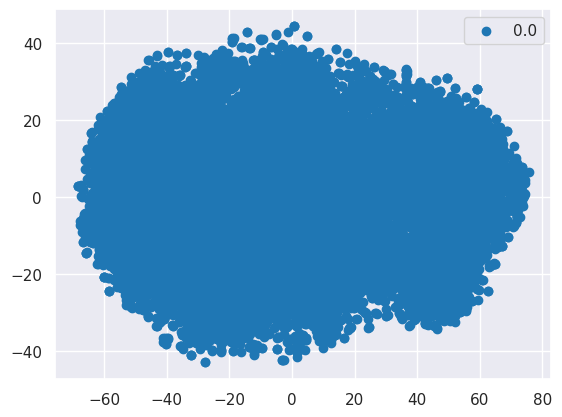

In [89]:
## ؟ points

from typing import List

def plot_docs(emb_vecs_2d: List, labels : List):
    """Draws a 2d plot of input vectors

    Parameters
    ----------
    emb_2d_vecs : List
        A list of 2d vectors

    Returns
    -------
    """

    # TODO: Draw a 2d plot from input vectors and color each cluster with specific color
    
    unique_labels = np.unique(labels)

    # Define a color map
    colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot each cluster with a different color
    for i, label in enumerate(unique_labels):
        emb_vecs_2d_cluster = emb_vecs_2d[labels == label]
        ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)

    # Add a legend and show the plot
    ax.legend()
    plt.show()

plot_docs(docs_embedding_2d, np.zeros(len(docs_embedding)))

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی مستندها</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به خوشه‌بندی اسناد با استفاده از بردارهای جاسازی مستخرج از مدل زبانی با دو روش Kmeans و خوشه‌بندی سلسله‌مراتبی می‌پردازید.
</font>
</div>

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش K-means</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را 
<u><b>از پایه</b></u>
 پیاده‌سازی کرده و سپس با استفاده از آن، خوشه‌های اسناد را ایجاد می‌کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های محتلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید. 
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
پیاده‌سازی خود را در تابع cluster_kmeans قرار دهید. این تابع یک لیست از بردارهای جاسازی دریافت کرده و در خروجی، مختصات مرکز هر خوشه را به همراه لیستی از شماره خوشه‌های متناظر با هر بردار جاسازی تولید می‌کند.
توجه کنید که الگوریتم می‌بایست از پایه پیاده‌سازی شود و امکان استفاده از پیاده‌سازی‌های آماده آن وجود ندارد.
</font>
</div>

In [90]:
## ؟ points

from typing import List

def cluster_kmeans(emb_vecs : List, n_clusters : int):
    """Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    emb_vecs = np.array(emb_vecs)
    centroids = emb_vecs[np.random.choice(emb_vecs.shape[0], n_clusters, replace=False)]

    for i in range(100):
        distances = np.sqrt(((emb_vecs - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        for j in range(n_clusters):
            centroids[j] = emb_vecs[labels == j].mean(axis=0)

    return centroids, labels

In [91]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def purity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    return np.sum(np.amax(matrix, axis=0)) / np.sum(matrix)

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


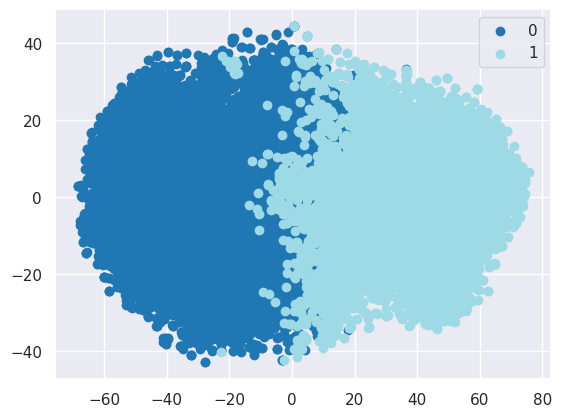

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


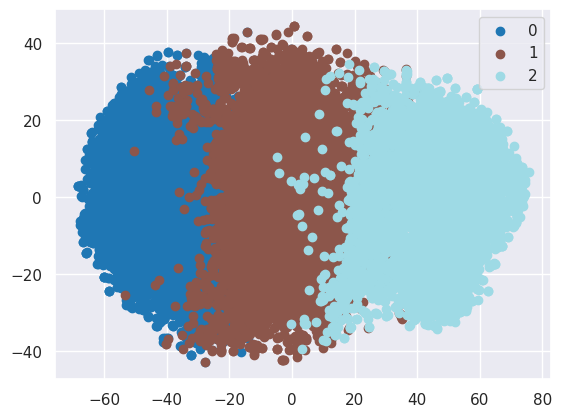

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


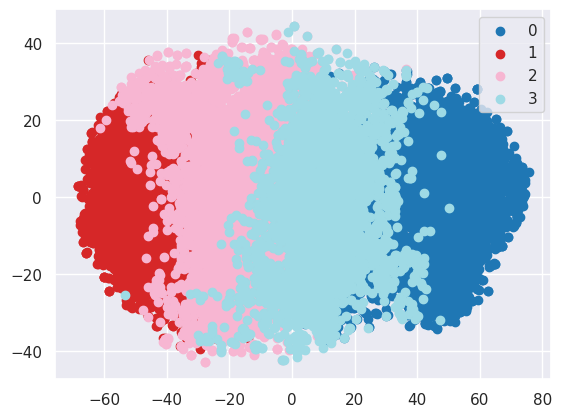

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


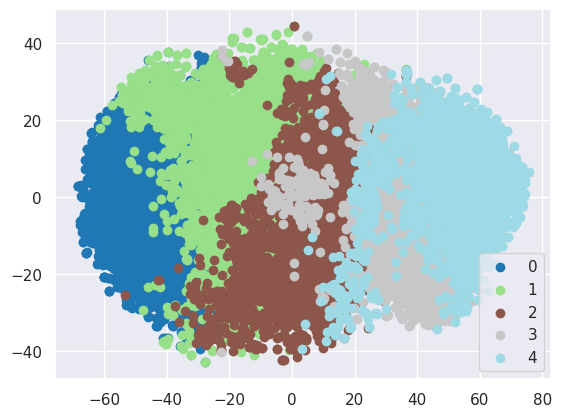

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


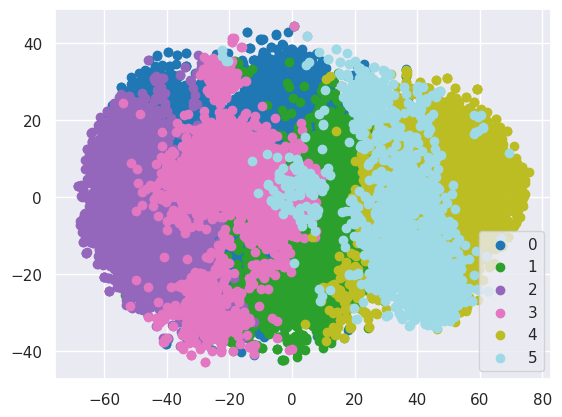

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


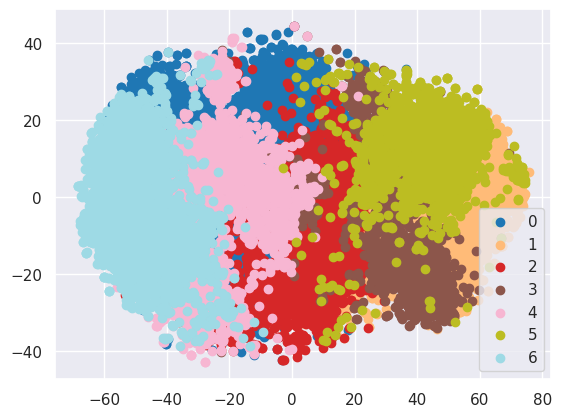

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


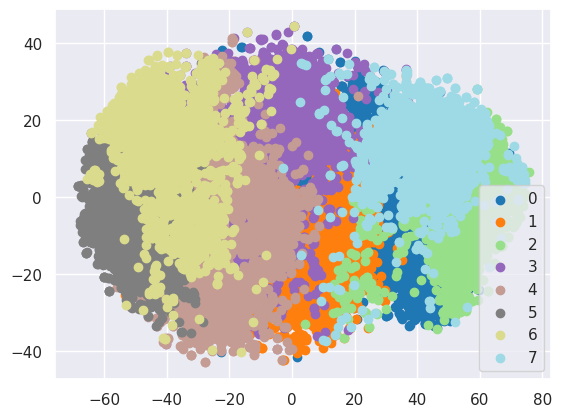

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


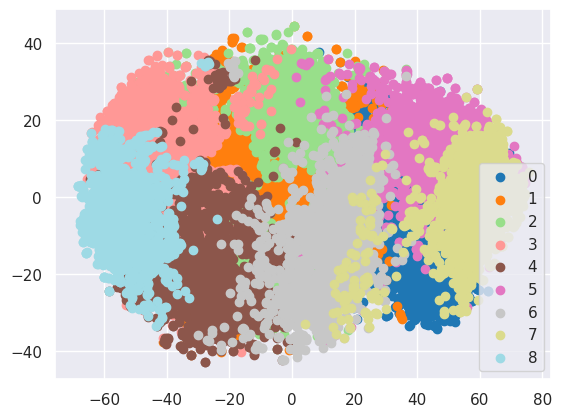

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


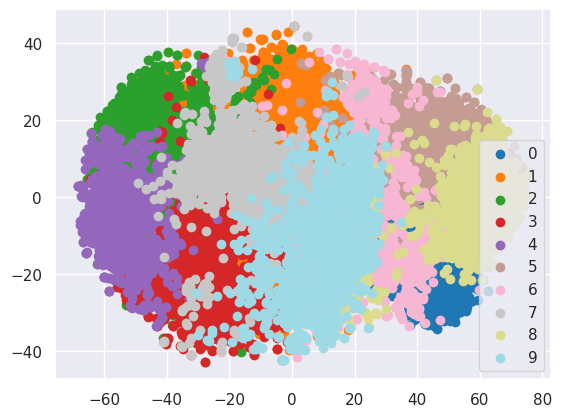

In [118]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
purity = []

true_labels = le.transform(y)

for k in range(2, 11):
    cluster_centers, cluster_means = cluster_kmeans(docs_embedding, k)
    silhouette_scores.append(silhouette_score(docs_embedding_2d, cluster_means))
    purity.append(purity_score(true_labels,cluster_means))
    plot_docs(docs_embedding_2d, cluster_means)

<ipython-input-89-4a86429776bc>:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(emb_vecs_2d_cluster[:, 0], emb_vecs_2d_cluster[:, 1], c=colors[i], label=label)


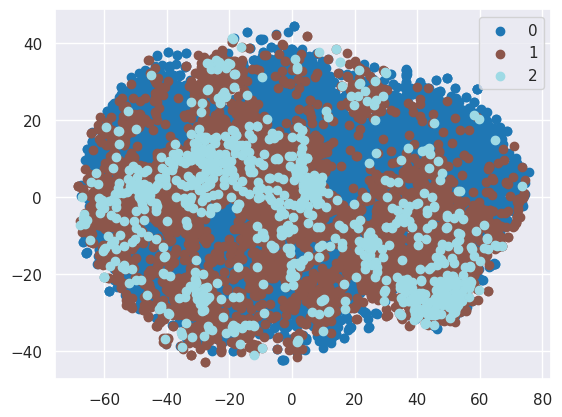

In [96]:
plot_docs(docs_embedding_2d, le.transform(y))

Text(0, 0.5, 'score')

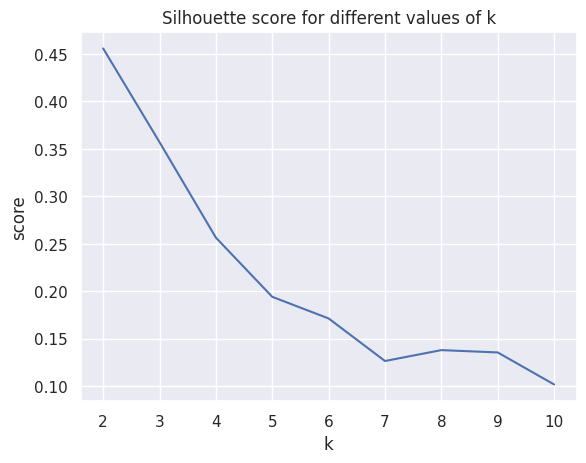

In [97]:
plt.plot(np.arange(2,11, 1),silhouette_scores)
plt.title('Silhouette score for different values of k')
plt.xlabel('k')
plt.ylabel('score')

Text(0, 0.5, 'purity')

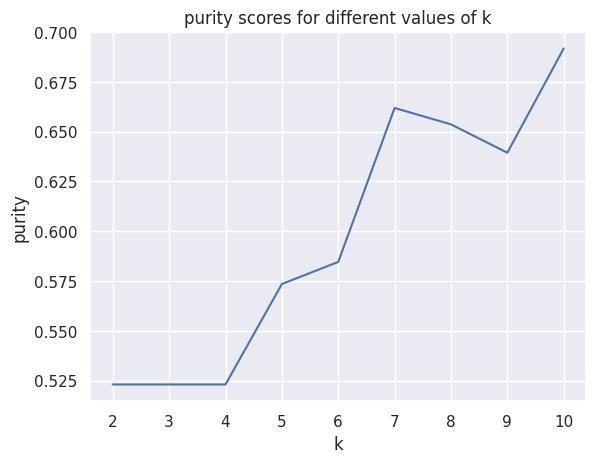

In [98]:
plt.plot(np.arange(2, 11), purity)
plt.title('purity scores for different values of k')
plt.xlabel('k')
plt.ylabel('purity')

<div dir="rtl">
<font face="XB Zar" size=4>
    <h3>
    <b>روش خوشه‌بندی سلسله‌مراتبی (Hierarchical Clustering)</b>
    </h3>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</font>
</div>

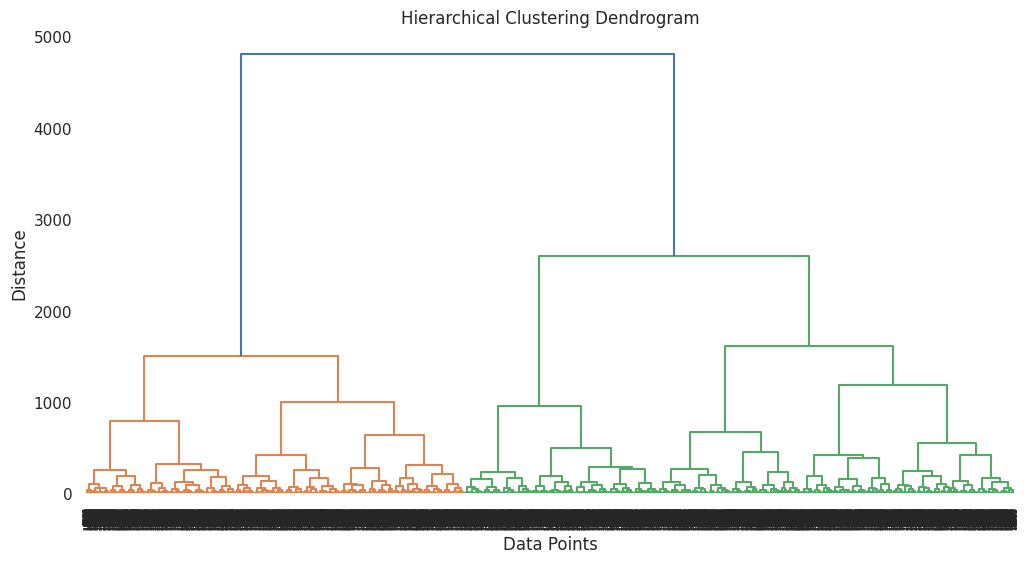

In [99]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

Z = shc.linkage(docs_embedding_2d, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dn = shc.dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>خوشه‌بندی خروجی‌های سیستم جستجو فاز ۱</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت شما به افزودن قابلیت خوشه‌بندی در سیستم جستجویی که در فاز ۱ درس توسعه داده‌اید می‌پردازید. برای این منظور، توابعی که تابحال پیاده‌سازی کرده‌اید را به نحوی به سامانه جستجوی فاز ۱ خود اضافه می‌کنید که اسناد خروجی سامانه را خوشه‌بندی کرده و در نمایش خروجی،‌ اسنادی که در یک خوشه هستند را مشخص کند.
می‌توانید با فراخوانی توابعی که در فاز ۱ پیاده‌سازی کرده‌اید و ایجاد تغییر در آن‌ها در سلول زیر، این‌کار را انجام دهید. نحوه پیاده‌سازی این بخش به عهده خودتان است.
</font>
</div>

In [116]:
def get_embeddings(doc_ids):
    global docs_embedding
    embeddings = []
    for id in doc_ids:
        idx = df.index.get_loc(id)
        embeddings.append(docs_embedding[idx])

    return embeddings


def cluster_results(doc_ids, k):
    doc_embeddings = get_embeddings(doc_ids)
    cluster_centers, cluster_means = cluster_kmeans(doc_embeddings, k)

    cluster_results = {}
    for i, doc_id in enumerate(doc_ids):
        cluster_id = cluster_means[i]
        if cluster_id not in cluster_results:
            cluster_results[cluster_id] = []
        cluster_results[cluster_id].append(doc_id)

    return cluster_results


results = search("From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling", "From a Point Cloud to a Simulation Model: Bayesian Segmentation and Entropy based Uncertainty Estimation for 3D Modelling",
       max_result_count=20, method='ltn-lnn', weight=0, print = False)

k = 3

print(f'Results before clustering and their corresponding score')
print(results)

print()
print(f'Results after clustering them into {k} clusters')

results = [item[0] for item in results]
clustered_results = cluster_results(results, k)
clustered_results

Results before clustering and their corresponding score
[(28347, 27.535767920116395), (4296, 8.23479678473283), (9959, 8.029865475705456), (28583, 8.029865475705456), (28688, 8.028403686064891), (29197, 7.8401573771805095), (28144, 7.653908831350756), (29063, 7.639731788263104), (29131, 7.579742013895439), (29296, 7.562884796865682), (29464, 7.5487077537780305), (29174, 7.3731766983407345), (28578, 7.35504805955685), (4814, 7.278380693034185), (16860, 7.032085404243856), (6395, 7.01978643565525), (7028, 7.017120295393727), (13015, 6.948742720166219), (5719, 6.942143494803464), (27859, 6.878025442422935)]

Results after clustering them into 3 clusters


{1: [28347, 4296, 9959, 28583, 29131, 29464, 4814, 13015, 27859],
 0: [28688, 29197, 28144, 29296, 29174, 28578, 7028],
 2: [29063, 16860, 6395, 5719]}

<div dir="rtl">
<font face="XB Zar" size=5>
    <h2>
    <b>جست‌و‌جوی اسناد مشابه با یک سند</b>
    </h2>
    <p></p>
    <p></p>
</font>
<font face="XB Zar" size=3>
در این قسمت، شما به پیاده‌سازی تابع find_similar_docs می‌پردازید که در آن با دریافت اندیس یک سند در مجموعه دادگان، تعداد اسناد مشابه مورد نظر و لیست بردارهای جاسازی، اندیس اسناد مشابه با آن در مجموعه دادگان را در خروجی تولید می‌کند. برای این منظور، به تعداد num_of_similar_docs تا از نزدیک‌ترین بردارها را به بردار مدنظر پیدا کرده و اندیس آن‌ها را به عنوان خروجی برمیگردانید. اسناد مشابه باید به ترتیب شباهت (مقدار شباهت بردار جاسازی آن‌ها به بردار جاسازی سند ورودی) مرتب شده باشند. انتخاب معیار شباهت برعهده خودتان است.
</font>
</div>

In [101]:
## ؟ points

from typing import List
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_docs(input_doc_index : int,
                      num_of_similar_docs: int,
                      emb_vecs : List):
    """Finds similar documents to input in dataset

    Parameters
    ----------
    input_doc_index: int
        Index of input document vector in emb_vecs list to search for specific paper

    num_of_similar_docs:
        Number of similar documents to return 

    emb_vecs : List
        A list of vectors corresponding to documents

    Returns
    -------
    List
        A list of similar document indexes to input document
    """

    input_vec = emb_vecs[input_doc_index]  # Get the input document vector
    similarities = cosine_similarity([input_vec], emb_vecs)[0]  # Calculate cosine similarities
    
    # Sort the similarities in descending order and get the indexes of the most similar documents
    similar_doc_indexes = np.argsort(similarities)[::-1][1:num_of_similar_docs+1]
    
    return similar_doc_indexes.tolist()

# find_similar_docs(int, int, [[NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...], [NUM, NUM, NUM, ...]])
find_similar_docs(10, 10, docs_embedding_2d)

[8734, 12448, 8503, 6181, 1212, 12908, 791, 5119, 10208, 7281]